## Model

april 14

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [182]:
#Read train 
deaths = pd.read_csv('data/deaths.csv')
cases = pd.read_csv('data/cases.csv')
deaths.drop(['Province/State'], axis=True)
deaths.shape

(274, 84)

In [820]:
df = pd.read_csv('Final-DATA.csv')
df['Province'] = deaths['Province/State']
df.shape

(274, 216)

In [184]:
df.drop(['GDP per Capita (PPP)','GDP (Billions, PPP)'], axis=1, inplace=True)

In [185]:
cols = df.columns.tolist() 
df.loc[147,['Unemployment (%)']] = 2.1

In [186]:
deathdate = cols[5:83]
casedate = cols[137:215]

## Visualization

In [187]:
def visu_death_case(ind_country):
    name = df.loc[ind_country]['Country/Region']
    a = df[deathdate].loc[ind_country]
    b = df[casedate].loc[ind_country]
    plt.plot(range(0,len(a)),a, label= name+' death');
    plt.plot(range(0,len(b)),b, label=name+' case');
    plt.legend();

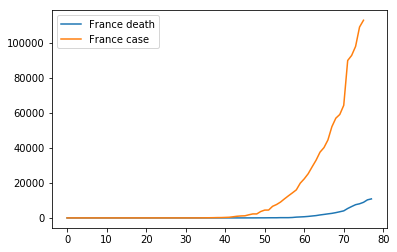

In [188]:
visu_death_case(115)

In [189]:
def visu_death_case(country='France'):
    tab = df[df['Country/Region'] == country]
    tab1 = tab[tab.Province.notnull()]
    ind = tab1.index
    tab2 = tab[tab.Province.isnull()]
    ind2 = tab2.index
    plt.figure(figsize=(10, 10))
    for it,i in enumerate(ind) :
        plt.subplot(len(ind), 2, it+1)
        name1 = tab.loc[i]['Territory']
        name2 = tab.loc[i]['Province']
        print(name2)
        if name1 == name2 :
            a =tab.loc[i][deathdate]
            b =tab.loc[i][casedate]
            plt.plot(range(0,len(a)),a, label= name1+' death');
            plt.plot(range(0,len(b)),b, label=name1+' case');
            plt.legend();
        else :
            a =tab.loc[i][deathdate]
            b =tab.loc[i][casedate]
            plt.plot(range(0,len(a)),a, label=name2+' death');
            plt.plot(range(0,len(b)),b, label=name2+' case');
            plt.legend();
        
    for it,i in enumerate(ind2) :
        plt.subplot(len(ind2)+len(ind), 2, it+1+len(ind))
        name1 = tab.loc[i]['Territory']
        a =tab.loc[i][deathdate]
        b =tab.loc[i][casedate]
        plt.plot(range(0,len(a)),a, label= name1+' death');
        plt.plot(range(0,len(b)),b, label=name1+' case');
        plt.legend();
        


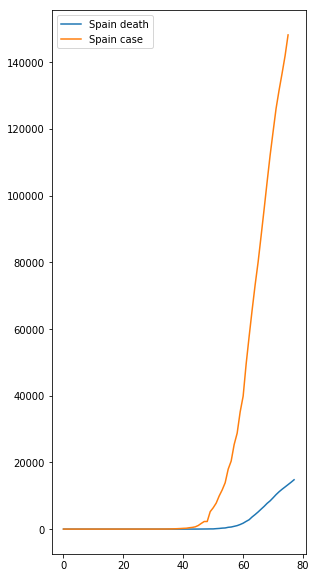

In [314]:
visu_death_case(country='Spain')

### Model

In [222]:
sub = pd.read_csv('submission/SampleSubLocal.csv')
datesub = ['4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20']

In [227]:
datesub = ['4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20']
train = df.copy()
test = pd.DataFrame()
for i in datesub:
    ind = df.columns.get_loc(i)
    train.drop(df.columns.get_values()[ind], axis=1, inplace=True)
    test[df.columns.get_values()[ind]] = df[df.columns.get_values()[ind]]

In [224]:
train.shape

(274, 207)

In [229]:
test.shape
test.head()

4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  4/8/20
0       6       6       7       7      11      14      14
1      16      17      20      20      21      22      22
2      86     105     130     152     173     193     205
3      15      16      17      18      21      22      23
4       2       2       2       2       2       2       2

In [195]:
# remove factorial variables
train.drop(['Province','Country/Region','Territory','Alpha-3 code', 'IncomeGroup','continent','lockdown_date','Type_lockdown'], axis=1, inplace=True)

## Algo ML classic

In [196]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [197]:
y = train['4/1/20']
train.drop('4/1/20', axis=1, inplace=True)
X = train.copy()

In [198]:
X.shape


(274, 198)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


In [200]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [206]:
clfs = {}
clfs['gbc'] = {'clf': GradientBoostingRegressor(), 'name': 'GradientBoostingClassifier'}
clfs['rf'] = {'clf': RandomForestRegressor(), 'name':'RandomForest'}
clfs['tree'] = {'clf': DecisionTreeRegressor(), 'name':'DecisionTreeClassifier'}
clfs['svc'] = {'clf': LinearRegression(), 'name': ' LinearRegression'}
clfs['knn'] = {'clf': KNeighborsRegressor(), 'name': 'KNeighborsClassifier'}




In [207]:
def Evaluation(clfs):
    for clf in clfs:
        clfs[clf]['score'] = cross_val_score(clfs[clf]['clf'], X_train, y_train, cv=3)
        print(clfs[clf]['name'] + ": %0.4f (+/- %0.4f)" % (clfs[clf]['score'].mean(), clfs[clf]['score'].std()*2))
        
Evaluation(clfs)

GradientBoostingClassifier: 0.3866 (+/- 1.2882)
RandomForest: 0.5750 (+/- 0.4676)
DecisionTreeClassifier: -1.0630 (+/- 4.4476)
 LinearRegression: -39.7004 (+/- 109.6926)
KNeighborsClassifier: 0.1254 (+/- 0.5513)


/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [209]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)



/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [217]:
y_pred_test = rf.predict(X_test)
y_pred_test

0.0

In [218]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

8681.016727272725

##  Clean Data

If 0 from the beggining, stay 0 for the rest. 

In [301]:
df_work = df.copy()
df_work.head(1)

Country/Region    Territory  Population   Lat  Long  1/22/20  1/23/20  \
0    Afghanistan  Afghanistan  26023100.0  33.0  65.0        0        0   

   1/24/20  1/25/20  1/26/20  ...  3/31/20cases  4/1/20cases  4/2/20cases  \
0        0        0        0  ...           174          237          273   

   4/3/20cases  4/4/20cases  4/5/20cases  4/6/20cases  4/7/20cases  \
0          281          299          349          367          423   

   4/8/20cases  Province  
0          444       NaN  

[1 rows x 214 columns]

In [302]:
list_countries_0 = []
for i in range(0,274):
    if sum(df.loc[i][death]) == 0:
        list_countries_0.append(i)

In [303]:
len(list_countries_0)

102

In [304]:
df_work.drop(list_countries_0, inplace=True)

In [305]:
df_work.shape

(172, 214)

In [306]:
df_work.drop(['Province','Country/Region','Territory','Alpha-3 code', 'IncomeGroup','continent','lockdown_date','Type_lockdown'], axis=1, inplace=True)

In [307]:
df_work.shape

(172, 206)

In [308]:
datesub = ['4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20']
for i in datesub:
    ind = df_work.columns.get_loc(i)
    df_work.drop(df_work.columns.get_values()[ind], axis=1, inplace=True)
    

In [309]:
y = df_work['4/2/20']
df_work.drop('4/2/20', axis=1, inplace=True)
X = df_work.copy()

In [310]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)


In [311]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


/Users/ines_admin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [312]:
y_pred_test = rf.predict(X_test)
y_pred_test

array([  2.6,  64.2,   5.5,   2.5,   1. ,   2.4,  65.5,   2.4,   1.2,
        37.2, 182.6,   1.2,   7.8,   5.3,   1.4,  34.4,  16. ,  17.2,
         1.1,  20.9,  13. ,   2.4,   5.3,   1. ,  18.3,   1. ,  65.3,
         1. ,  13.6,  15.4, 671.8,   6.4,   1.3,   5.9,   3.5])

In [313]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred_test)

12894.336000000001

## Hill Model

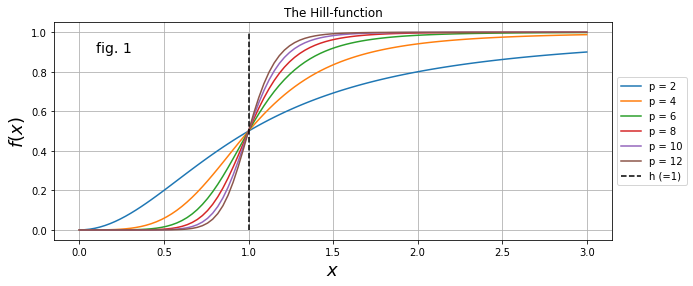

In [317]:
import numpy as np
fig = plt.figure(figsize=(10,4))

h = 1

for p in range(2,14,2):
    X = []; FX = []
    for x in np.linspace(0,3,100):
        fx = x**p/(x**p + h**p)
        X.append(x)
        FX.append(fx)    
    plt.plot(X, FX, label = 'p = ' + str(p))
    
plt.plot([h,h],[0,1], 'k--', label = 'h (='  + str(h) + ')')
plt.title('The Hill-function')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x)$', fontsize=18)
plt.grid()
plt.text(0.1, .9, 'fig. 1', fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

http://systems-sciences.uni-graz.at/etextbook/sw2/crittrans.html

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.lsq_linear.html

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.ode.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [354]:
from scipy.optimize import curve_fit

In [412]:
def func(t,d,k,n):
    fx = d*(t**n/(t**n + k**n))
    return(fx)

In [702]:
def hill_model(ind):
    ydata = df.loc[ind].to_list()[5:80]
    t = np.arange(1, len(ydata)+1)
    popt, pcov = curve_fit(func, t, ydata)
    val =[]
    for t in np.arange(len(ydata)+1, len(ydata)+8):
        val.append(func(t, *popt))
    return(val)

In [467]:
df_work.index

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  11,
            ...
            221, 222, 223, 224, 225, 228, 229, 233, 240, 247],
           dtype='int64', length=172)

In [575]:
ind = df_work.index.to_list()
ind.remove(2)
ind.remove(4)
ind.remove(8)
ind.remove(13)
ind.remove(18)
ind.remove(29)
ind.remove(30)
ind.remove(32)
ind.remove(38)
ind.remove(40)
ind.remove(42)
ind.remove(74)
ind.remove(86)
ind.remove(87)
ind.remove(88)
ind.remove(96)
ind.remove(98)
ind.remove(109)
ind.remove(113)
ind.remove(114)
ind.remove(116)
ind.remove(117)
ind.remove(124)
ind.remove(127)
ind.remove(128)
ind.remove(145)
ind.remove(154)
ind.remove(156)
ind.remove(157)
ind.remove(158)
ind.remove(166)
ind.remove(168)
ind.remove(169)
ind.remove(171)
ind.remove(174)
ind.remove(181)
ind.remove(191)
ind.remove(195)
ind.remove(205)
ind.remove(228)
ind.remove(229)
ind.remove(233)
ind.remove(247)

In [576]:
hill_model_worksfor = []
for i in ind:
    hill_model_worksfor.append(i)
#     hill_model(i)



In [577]:
hill_model_notwork = [2,4,8,13,18,29,30,32,38,40,42,74,86,87,88,96,98,109,113,114,116,117,124,127,128,145,154,156,157,158,166,168,169,171,174,181,191,195,205,228,229,233,247]

In [578]:
len(hill_model_notwork) + len(hill_model_worksfor)

172

In [580]:
len(hill_model_worksfor)

129

## Reste 

if 1, stay 1

In [712]:
list_countries_1 = []
rest=[]
for i in hill_model_notwork:
    if (df.loc[i]['4/1/20']) == 1:
        list_countries_1.append(i)
    else:
        rest.append(i)

In [713]:
len(list_countries_1)

23

In [714]:
df.loc[rest]

Country/Region                   Territory    Population        Lat  \
2          Algeria                     Algeria  3.870000e+07  28.033900   
4           Angola                      Angola  2.438330e+07 -11.202700   
13       Australia                   Australia  2.369690e+07 -41.454500   
30        Bulgaria                    Bulgaria  7.245677e+06  42.733900   
42          Canada                      Canada  3.554042e+07  51.253800   
74           China                       China  1.367110e+09  31.202000   
87         Croatia                     Croatia  4.267558e+06  45.100000   
88            Cuba                        Cuba  1.121006e+07  22.000000   
96         Ecuador                     Ecuador  1.588890e+07  -1.831200   
114         France                      France  6.607800e+07  14.641500   
124         Guyana                      Guyana  7.848940e+05   5.000000   
127        Hungary                     Hungary  9.879000e+06  47.162500   
128        Iceland                     Iceland  3.281700e+05  64.963100   
145        Lebanon                     Lebanon  4.104000e+06  33.854700   
156         Mexico                      Mexico  1.197132e+08  23.634500   
157        Moldova   Republic of Moldova (the)  3.550000e+06  47.411600   
171        Nigeria                     Nigeria  1.785170e+08   9.082000   
181         Poland                      Poland  3.849600e+07  51.919400   
205        Taiwan*                      Taiwan  2.378000e+07  23.700000   
233          Syria  Syrian Arab Republic (the)  1.827000e+07  34.802075   

           Long  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  ...  \
2      1.659600        0        0        0        0        0  ...   
4     17.873900        0        0        0        0        0  ...   
13   145.970700        0        0        0        0        0  ...   
30    25.485800        0        0        0        0        0  ...   
42   -85.323200        0        0        0        0        0  ...   
74   121.449100        0        0        0        0        1  ...   
87    15.200000        0        0        0        0        0  ...   
88   -80.000000        0        0        0        0        0  ...   
96   -78.183400        0        0        0        0        0  ...   
114  -61.024200        0        0        0        0        0  ...   
124  -58.750000        0        0        0        0        0  ...   
127   19.503300        0        0        0        0        0  ...   
128  -19.020800        0        0        0        0        0  ...   
145   35.862300        0        0        0        0        0  ...   
156 -102.552800        0        0        0        0        0  ...   
157   28.369900        0        0        0        0        0  ...   
171    8.675300        0        0        0        0        0  ...   
181   19.145100        0        0        0        0        0  ...   
205  121.000000        0        0        0        0        0  ...   
233   38.996815        0        0        0        0        0  ...   

     3/31/20cases  4/1/20cases  4/2/20cases  4/3/20cases  4/4/20cases  \
2             716          847          986         1171         1251   
4               7            8            8            8           10   
13             69           69           72           74           80   
30            399          422          457          485          503   
42           1966         2392         2793         3255         3630   
74            509          516          522          526          529   
87            867          963         1011         1079         1126   
88            186          212          233          269          288   
96           2240         2748         3163         3368         3465   
114           128          135          138          143          145   
124            12           19           19           23           23   
127           492          525          585          623          678   
128          1135         122

### Exponential Model for the rest

In [796]:
dffinal = pd.DataFrame({'Territory':  df['Territory']  , 'Country/Region' : df['Country/Region'], '4/2/20':[None] * 274,
                       '4/3/20': [None] * 274, '4/4/20': [None] * 274, '4/5/20': [None] * 274,
                       '4/6/20': [None] * 274, '4/7/20': [None] * 274, '4/8/20': [None] * 274})

col = ['4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20']
for var in col :
    for i in list_countries_0:
        dffinal.loc[i,[var]] = 0 

    for i in list_countries_1:
        dffinal.loc[i,[var ]] = 1

    dffinal.loc[4,[var]] = 8
    dffinal.loc[13,[var ]] = 2
    dffinal.loc[114,[var ]] = 4
    dffinal.loc[124,[var ]] = 4
    dffinal.loc[205,[var ]] = 5
    dffinal.loc[233,[var ]] = 2



In [797]:
for i in hill_model_worksfor:
    val =hill_model(i)
    for v, var in enumerate(col) :
        dffinal.loc[i,[var]] = val[v]

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/ines_admin/anaconda3/lib/p

In [821]:
dffinal.shape

(274, 9)

In [799]:
def fit_expo(ind):
    '''Fit an exponentiel curve to the data
    country : country between quote '''
    y_data = df.loc[ind].to_list()[5:80]
    y_data  =list(filter(lambda a: a != 0, y_data))
    x_data = np.arange(1, len(y_data)+1)
    log_y_data = np.log(y_data)
    a,b = np.polyfit(x_data, log_y_data, 1)
    y = np.exp(b) * np.exp(a*x_data)
    
    x = np.arange(len(x_data), len(x_data)+7)
    return(np.exp(b) * np.exp(a*x))
#     plt.plot(x_data, y_data, "o", label='Data')
#     plt.plot(x_data, y, label='y = {:.2f}exp({:.2f}x)'.format(np.exp(b), a));
#     plt.xlabel('Number of days')
#     plt.legend()
    

In [800]:
fit_expo(2)

array([140.25709613, 167.38948388, 199.77056481, 238.41568563,
       284.53660933, 339.57951144, 405.2703266 ])

In [801]:
list1 =[4,13,114,124,205,233]


In [803]:
restfinal = [x for x in rest if x not in list1]

In [804]:
for i in restfinal:
    print(i)
    val = fit_expo(i)
    print(val)
    for v, var in enumerate(col) :
        dffinal.loc[i,[var]] = val[v]

2
[140.25709613 167.38948388 199.77056481 238.41568563 284.53660933
 339.57951144 405.2703266 ]
30
[14.55298122 16.20832851 18.05196538 20.10530905 22.3922129  24.93924353
 27.77598939]
42
[127.38491052 164.25295443 211.79143534 273.0886165  352.1265737
 454.03988454 585.4491883 ]
74
[6.25146398 6.43474258 6.62339449 6.81757725 7.017453   7.22318864
 7.43495599]
87
[13.87719544 16.57198752 19.79007731 23.63308319 28.22235672 33.70281449
 40.24751426]
88
[ 8.113412    9.32330632 10.7136234  12.31126839 14.1471586  16.2568218
 18.68108379]
96
[ 258.93459624  327.50072806  414.22323798  523.9099525   662.64181525
  838.11000958 1060.04235169]
127
[ 44.63193365  53.41664216  63.93040645  76.51354905  91.57337662
 109.59736426 131.16893463]
128
[3.38257154 3.58380316 3.7970062  4.02289283 4.26221762 4.51578002
 4.78442703]
145
[17.39345617 19.00555316 20.76706593 22.69184294 24.7950162  27.09312019
 29.60422191]
156
[ 87.01550038 113.08800757 146.97263593 191.01013605 248.24261905
 322.6237

## Submit 

In [903]:
samplesub = pd.read_csv('submission/SampleSubLocal.csv')
samplesub.shape

(1463, 2)

In [904]:
samplesub.head(2)

Territory X Date  target
0  Afghanistan X 4/2/20       0
1  Afghanistan X 4/3/20       0

In [999]:
tr = pd.read_csv('train.csv')
tr.shape

(14839, 5)

In [1000]:
tr.head(2)

Territory X Date  target  cases    Territory     Date
0  Afghanistan X 1/22/20       0      0  Afghanistan  1/22/20
1  Afghanistan X 1/23/20       0      0  Afghanistan  1/23/20

In [1002]:

test_dates = ['4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20']
countries = dffinal.groupby('Territory').sum()[test_dates] # Group by country/region, and select only the columns for the test_period

# Create a new dataframe, with a Region X Date column. 
reference = pd.DataFrame({
    'Territory X Date':list(map((lambda x: ' X '.join(x)), list(countries.stack().index.to_flat_index()))), # Check output to see what this is doing
    'target':countries.stack() # The target we'll be predicting: cumulative number of cases for a given region at a given date.
}).reset_index(drop=True) # Don't need the multiIndex created with Stack
reference.to_csv('reference.csv', index=False)


Territory X Date    target
0  Afghanistan X 4/2/20  6.711351
1  Afghanistan X 4/3/20  6.850611
2  Afghanistan X 4/4/20  6.961906
3  Afghanistan X 4/5/20  7.050449
4  Afghanistan X 4/6/20  7.120683

In [1003]:
reference.shape

(1463, 2)

In [1005]:
reference.to_csv('submission1.csv',index=False)

In [1004]:
reference.head(20)

Territory X Date      target
0   Afghanistan X 4/2/20    6.711351
1   Afghanistan X 4/3/20    6.850611
2   Afghanistan X 4/4/20    6.961906
3   Afghanistan X 4/5/20    7.050449
4   Afghanistan X 4/6/20    7.120683
5   Afghanistan X 4/7/20    7.176301
6   Afghanistan X 4/8/20    7.220314
7       Albania X 4/2/20   21.586350
8       Albania X 4/3/20   22.660512
9       Albania X 4/4/20   23.627660
10      Albania X 4/5/20   24.489594
11      Albania X 4/6/20   25.251081
12      Albania X 4/7/20   25.918904
13      Albania X 4/8/20   26.501028
14      Algeria X 4/2/20  140.257096
15      Algeria X 4/3/20  167.389484
16      Algeria X 4/4/20  199.770565
17      Algeria X 4/5/20  238.415686
18      Algeria X 4/6/20  284.536609
19      Algeria X 4/7/20  339.579511

In [908]:
len(dffinal.Territory.unique())

209

In [909]:
dffinal.head(2)

Territory Country/Region   4/2/20   4/3/20   4/4/20   4/5/20   4/6/20  \
0  Afghanistan    Afghanistan  6.71135  6.85061  6.96191  7.05045  7.12068   
1      Albania        Albania  21.5863  22.6605  23.6277  24.4896  25.2511   

    4/7/20   4/8/20  
0   7.1763  7.22031  
1  25.9189   26.501

In [968]:
dffinal.Territory.index

RangeIndex(start=0, stop=274, step=1)

In [982]:
dffinal.loc[0]['4/8/20']

7.220314328726383

In [992]:
len(dffinal.Territory.unique())

209

In [995]:
samplesub.shape

(1463, 2)

In [993]:
dffinal

Territory  \
0                                          Afghanistan   
1                                              Albania   
2                                              Algeria   
3                                              Andorra   
4                                               Angola   
5                                  Antigua and Barbuda   
6                                            Argentina   
7                                              Armenia   
8                                            Australia   
9                                            Australia   
10                                           Australia   
11                                           Australia   
12                                           Australia   
13                                           Australia   
14                                           Australia   
15                                           Australia   
16                                             Austria   
17                                          Azerbaijan   
18                                       Bahamas (the)   
19                                             Bahrain   
20                                          Bangladesh   
21                                            Barbados   
22                                             Belarus   
23                                             Belgium   
24                                               Benin   
25                                              Bhutan   
26                    Bolivia (Plurinational State of)   
27                              Bosnia and Herzegovina   
28                                              Brazil   
29                                   Brunei Darussalam   
..                                                 ...   
244  United Kingdom of Great Britain and Northern I...   
245  United Kingdom of Great Britain and Northern I...   
246  United Kingdom of Great Britain and Northern I...   
247                                           Botswana   
248                                            Burundi   
249                                       Sierra Leone   
250                                  Netherlands (the)   
251                                             Malawi   
252  United Kingdom of Great Britain and Northern I...   
253                                             France   
254                                        South Sudan   
255                              Sao Tome and Principe   
256                                      Comoros (the)   
257                                           Kiribati   
258                                            Lesotho   
259                             Marshall Islands (the)   
260                   Micronesia (Federated States of)   
261                                            Myanmar   
262                                              Nauru   
263                                              Palau   
264                            Republic of Korea (the)   
265                                              Samoa   
266                                    Solomon Islands   
267                                        Sudan (the)   
268                                         Tajikistan   
269                                              Tonga   
270                                       Turkmenistan   
271                                             Tuvalu   
272                                            Vanuatu   
273                                              Yemen   

                       Country/Region   4/2/20   4/3/20   4/4/20   4/5/20  \
0                         Afghanistan  6.71135  6.85061  6.96191  7.05045   
1                             Albania  21.5863  22.6605  23.6277  24.4896   
2                             Algeria  140.257  167.389  199.771  238.416   
3                             Andorra   18.236  18.4766  18.6283  18.7237   
4                              Angola        8        8        

In [990]:
ind = dffinal.Territory.index
res =[]
l_data = ['4/2/20','4/3/20','4/4/20','4/5/20','4/6/20','4/7/20','4/8/20']
for i in range(0,274):
    tab =dffinal.loc[i]
    for j in l_data:
        v = tab[j]
        v = float(v)
        res.append(v)
       


In [991]:
len(res)


1918

In [964]:
samplesub.target = res

ValueError: Length of values does not match length of index

In [929]:
samplesub

Territory X Date                target
0                            Afghanistan X 4/2/20   [6.711351473184588]
1                            Afghanistan X 4/3/20   [6.850610882266405]
2                            Afghanistan X 4/4/20    [6.96190624047418]
3                            Afghanistan X 4/5/20   [7.050448751664359]
4                            Afghanistan X 4/6/20   [7.120682982082803]
5                            Afghanistan X 4/7/20   [7.176301189955834]
6                            Afghanistan X 4/8/20   [7.220314328726383]
7                                Albania X 4/2/20   [21.58634951634272]
8                                Albania X 4/3/20  [22.660512211132115]
9                                Albania X 4/4/20  [23.627660012490953]
10                               Albania X 4/5/20  [24.489593816453052]
11                               Albania X 4/6/20  [25.251081272383015]
12                               Albania X 4/7/20    [25.9189040382455]
13                               Albania X 4/8/20  [26.501028270030112]
14                               Algeria X 4/2/20   [140.2570961285605]
15                               Algeria X 4/3/20  [167.38948387790893]
16                               Algeria X 4/4/20  [199.77056481498892]
17                               Algeria X 4/5/20  [238.41568563296434]
18                               Algeria X 4/6/20  [284.53660932719947]
19                               Algeria X 4/7/20  [339.57951144228457]
20                               Algeria X 4/8/20   [405.2703265989103]
21                               Andorra X 4/2/20    [18.2360335727815]
22                               Andorra X 4/3/20  [18.476612941775173]
23                               Andorra X 4/4/20  [18.628264442738967]
24                               Andorra X 4/5/20  [18.723687384972987]
25                               Andorra X 4/6/20  [18.783794145368756]
26                               Andorra X 4/7/20   [18.82176135267404]
27                               Andorra X 4/8/20  [18.845835494402486]
28                                Angola X 4/2/20                   [8]
29                                Angola X 4/3/20                   [8]
...                                           ...                   ...
1433  Venezuela (Bolivarian Republic of) X 4/7/20                   [0]
1434  Venezuela (Bolivarian Republic of) X 4/8/20                   [0]
1435                            Viet Nam X 4/2/20                   [0]
1436                            Viet Nam X 4/3/20                   [0]
1437                            Viet Nam X 4/4/20                   [0]
1438                            Viet Nam X 4/5/20                   [0]
1439                            Viet Nam X 4/6/20                   [0]
1440                            Viet Nam X 4/7/20                   [0]
1441                            Viet Nam X 4/8/20                   [0]
1442                               Yemen X 4/2/20                   [0]
1443                               Yemen X 4/3/20                   [0]
1444                               Yemen X 4/4/20                   [0]
1445                               Yemen X 4/5/20                   [0]
1446                               Yemen X 4/6/20                   [0]
1447                               Yemen X 4/7/20                   [0]
1448                               Yemen X 4/8/20                   [0]
1449                              Zambia X 4/2/20                   [0]
1450                              Zambia X 4/3/20                   [0]
1451                              Zambia X 4/4/20                   [0]
1452                              Zambia X 4/5/20                   [0]
1453                              Zambia X 4/6/20                   [0]
1454                              Zambia X 4/7/20                   [0]
1455                              Zambia X 4/8/20                   [0]
1456                            Zimbabwe X 4/2/20                   [0]
1

In [882]:
for i in res:
    if type(i) ==str:
        res.remove(i)

In [883]:
len (res)

2136

In [819]:
len(pd.read_csv('train.csv').Territory.unique())

209

In [458]:
ydata = df.loc[115].to_list()[5:80]
t = np.arange(1, len(ydata)+1)

In [459]:
popt, pcov = curve_fit(func, t, ydata)

/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in power
  
/Users/ines_admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


In [460]:
for t in np.arange(len(ydata)+1, len(ydata)+9):
    print(func(t, *popt))

9657.287549881336
11069.353072117177
12606.932392219349
14263.374792517607
16028.078840308917
17886.568849586416
19820.857043431824
21810.08737730611


plt.plot(t, ydata, 'b-', label='data')
plt.plot(t, func(t, *popt), 'r-',label='fit: d=%5.3f, k=%5.3f, n=%5.3f' % tuple(popt));
plt.legend()


8.864117209497183e-05

In [856]:
tr = pd.read_csv('train.csv')
l1= tr.Territory.unique()

In [857]:
l2 = dffinal.Territory.unique()

In [877]:
len(l1)

209

In [870]:
# dffinal.stack()
# dffinal.melt(id_vars =['Territory']) 
dffinal[dffinal.Territory == 'Zimbabwe']

Territory Country/Region 4/2/20 4/3/20 4/4/20 4/5/20 4/6/20 4/7/20 4/8/20
228  Zimbabwe       Zimbabwe      1      1      1      1      1      1      1

In [845]:
dffinal2 = dffinal.stack().to_frame()
dffinal2 

0
0   Territory       Afghanistan
    Country/Region  Afghanistan
    4/2/20              6.71135
    4/3/20              6.85061
    4/4/20              6.96191
    4/5/20              7.05045
    4/6/20              7.12068
    4/7/20               7.1763
    4/8/20              7.22031
1   Territory           Albania
    Country/Region      Albania
    4/2/20              21.5863
    4/3/20              22.6605
    4/4/20              23.6277
    4/5/20              24.4896
    4/6/20              25.2511
    4/7/20              25.9189
    4/8/20               26.501
2   Territory           Algeria
    Country/Region      Algeria
    4/2/20              140.257
    4/3/20              167.389
    4/4/20              199.771
    4/5/20              238.416
    4/6/20              284.537
    4/7/20               339.58
    4/8/20               405.27
3   Territory           Andorra
    Country/Region      Andorra
    4/2/20               18.236
...                         ...
270 4/6/20                    0
    4/7/20                    0
    4/8/20                    0
271 Territory            Tuvalu
    Country/Region       Tuvalu
    4/2/20                    0
    4/3/20                    0
    4/4/20                    0
    4/5/20                    0
    4/6/20                    0
    4/7/20                    0
    4/8/20                    0
272 Territory           Vanuatu
    Country/Region      Vanuatu
    4/2/20                    0
    4/3/20                    0
    4/4/20                    0
    4/5/20                    0
    4/6/20                    0
    4/7/20                    0
    4/8/20                    0
273 Territory             Yemen
    Country/Region        Yemen
    4/2/20                    0
    4/3/20                    0
    4/4/20                    0
    4/5/20                    0
    4/6/20                    0
    4/7/20                    0
    4/8/20                    0

[2410 rows x 1 columns]

## SIR model

In [318]:
from scipy.integrate import odeint

In [348]:
class SIR():
    '''Simulate the SIR model with parameters
    alpha : float
    beta : float
    gama: float
    '''
    def __init__(self, beta = -0.5 , gamma = 1.0):
       
        super(SIR, self).__init__()
        
        self.beta = beta
        self.gamma= gamma
        

    def forward(self, X, t):
        """
        Integrate
        |  :param X: [S, I, R]
        |  :param t: time 
        |  :return:
        """
        dSdt = -self.beta*X[0]*X[1]
        dIdt = self.beta*X[0]*X[1] - self.gamma *X[1]
        dRdt = self.gamma*X[1]
        return dSdt, dIdt, dRdt

In [349]:
N0= 100           # Population size
gamma=0.2        # Recovery rate
R0=2       # R0
beta=R0*gamma/N0

tmin = 0.0
tmax = 100.0
dt = 0.01
ts= np.linspace(tmin, tmax, 1000)

modhh = SIR(beta=beta, gamma=gamma)

S1= 100
I1= 0 
R1= 0
X0= [S1-1,I1+1, R1]


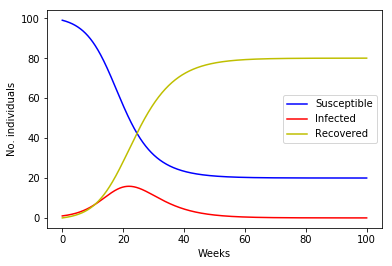

In [353]:
sol = odeint(modhh.forward, X0, ts)
fig1=plt.figure()
plt.plot(ts,(sol[:,0]),'b',label='Susceptible')
plt.plot(ts,(sol[:,1]),'r',label='Infected')
plt.plot(ts,(N0-sol[:,0]-sol[:,1]),'y',label='Recovered')
plt.xlabel('Weeks')
plt.ylabel('No. individuals')
plt.legend();

In [325]:
sol

array([[9.90000000e+01, 1.00000000e+00, 0.00000000e+00],
       [9.89599771e+01, 1.01980520e+00, 2.02176491e-02],
       [9.89191786e+01, 1.03998582e+00, 4.08355370e-02],
       ...,
       [1.99821213e+01, 3.78341656e-03, 8.00140953e+01],
       [1.99820912e+01, 3.73821521e-03, 8.00141706e+01],
       [1.99820615e+01, 3.69355384e-03, 8.00142449e+01]])